In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
a = 1
b = 5
m = 4
n = 8
h = (b - a) / n

In [13]:
def find_lambda(A, b):
    return (np.linalg.inv(A).dot(b.T)).T
def z(xx, lambdA, m):
    return sum([lambdA[i] * xx**i for i in range(m)])

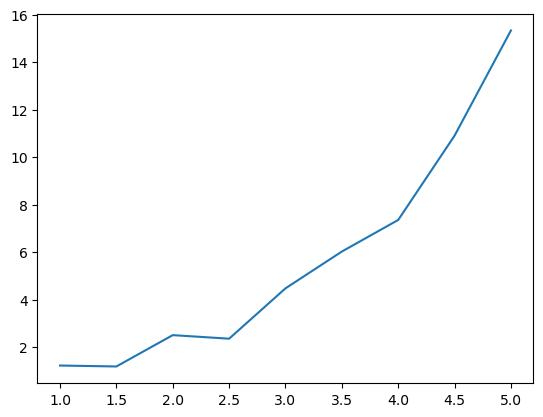

In [14]:
x = np.asarray([1+i*h for i in range(n+1)])
y = np.asarray([1.22, 1.18, 2.5, 2.35, 4.47, 6.02, 7.35, 10.9, 15.33])
A = np.array([[sum(x[k] ** (i+j) for k in range(n+1)) for j in range(m)] for i in range(m)])
b = np.array([sum(y[k] * (x[k] ** i) for k in range(n+1)) for i in range(m)]) 
lambdA = find_lambda(A, b)
plt.plot(x, y)


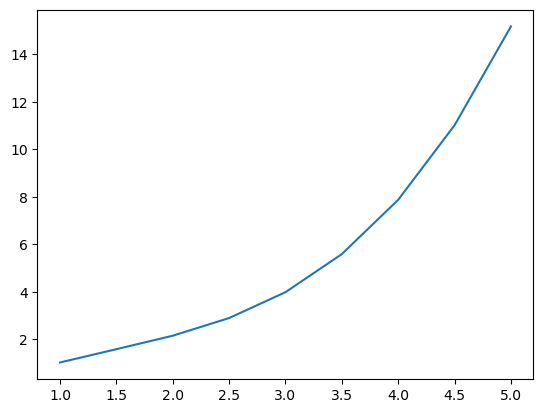

In [15]:
plt.plot(x, z(x, lambdA, m))

In [ ]:
big_delta = sum([(y[i] - z(x)[i]) for i in range(m+1)])**2
big_delta = np.sqrt(big_delta) / np.sqrt(n)
small_delta = sum([y[i]**2 for i in range(n+1)])
small_delta = big_delta / np.sqrt(small_delta)
print(big_delta, small_delta)